In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
classes = os.listdir('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test')
num_class=len(classes)
num_class

10

In [3]:
 img=ImageDataGenerator(rescale=1./255)
#     ,rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")
# from tensorflow.keras.applications.resnet50 import preprocess_input
# img = ImageDataGenerator(preprocessing_function=preprocess_input)
SEED = 42
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224
INIT_LR = 1e-3

In [4]:
train_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/train',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       subset = 'training',
                                       batch_size=BATCH_SIZE,
                                       )

Found 7280 images belonging to 10 classes.


In [5]:
val_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/val',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       
                                       batch_size=BATCH_SIZE,
                                       )

Found 1036 images belonging to 10 classes.


In [6]:
test_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test',
                                       target_size=(640,480),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 2091 images belonging to 10 classes.


In [7]:
xcep=tf.keras.applications.Xception(input_shape=(640,480,3),weights='imagenet', include_top=False)
for i in xcep.layers:
    i.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [8]:
model = tf.keras.models.Sequential([
    xcep,
    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 20, 15, 2048)      20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 15, 128)       2359424   
                                                                 
 activation (Activation)     (None, 20, 15, 128)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 20, 15, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 7, 128)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 7, 128)        0

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [11]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3, restore_best_weights = True)

In [12]:
history=model.fit(train_ds,validation_data=val_ds,epochs=20,callbacks = [callback2])

Epoch 1/20


2023-04-27 12:19:12.258707: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


114/114 [==============================] - 216s 2s/step - loss: 1.3923 - accuracy: 0.5595 - val_loss: 1.0388 - val_accuracy: 0.6959
Epoch 2/20
114/114 [==============================] - 149s 1s/step - loss: 0.6781 - accuracy: 0.7909 - val_loss: 0.7306 - val_accuracy: 0.7963
Epoch 3/20
114/114 [==============================] - 149s 1s/step - loss: 0.4165 - accuracy: 0.8783 - val_loss: 0.5578 - val_accuracy: 0.8465
Epoch 4/20
114/114 [==============================] - 149s 1s/step - loss: 0.2857 - accuracy: 0.9224 - val_loss: 0.5729 - val_accuracy: 0.8205
Epoch 5/20
114/114 [==============================] - 149s 1s/step - loss: 0.2010 - accuracy: 0.9493 - val_loss: 0.3996 - val_accuracy: 0.8842
Epoch 6/20
114/114 [==============================] - 150s 1s/step - loss: 0.1426 - accuracy: 0.9672 - val_loss: 0.4043 - val_accuracy: 0.8716
Epoch 7/20
114/114 [==============================] - 151s 1s/step - loss: 0.1077 - accuracy: 0.9787 - val_loss: 0.3741 - val_accuracy: 0.8890
Epoch 8/20

In [13]:
model.evaluate(test_ds)

33/33 [==============================] - 54s 2s/step - loss: 0.2856 - accuracy: 0.9201


[0.285563588142395, 0.9201338887214661]

In [14]:
model.save("XCEPTIONV3_model.h5")

In [15]:
import matplotlib.pyplot as plt

metrics of xceptionV3


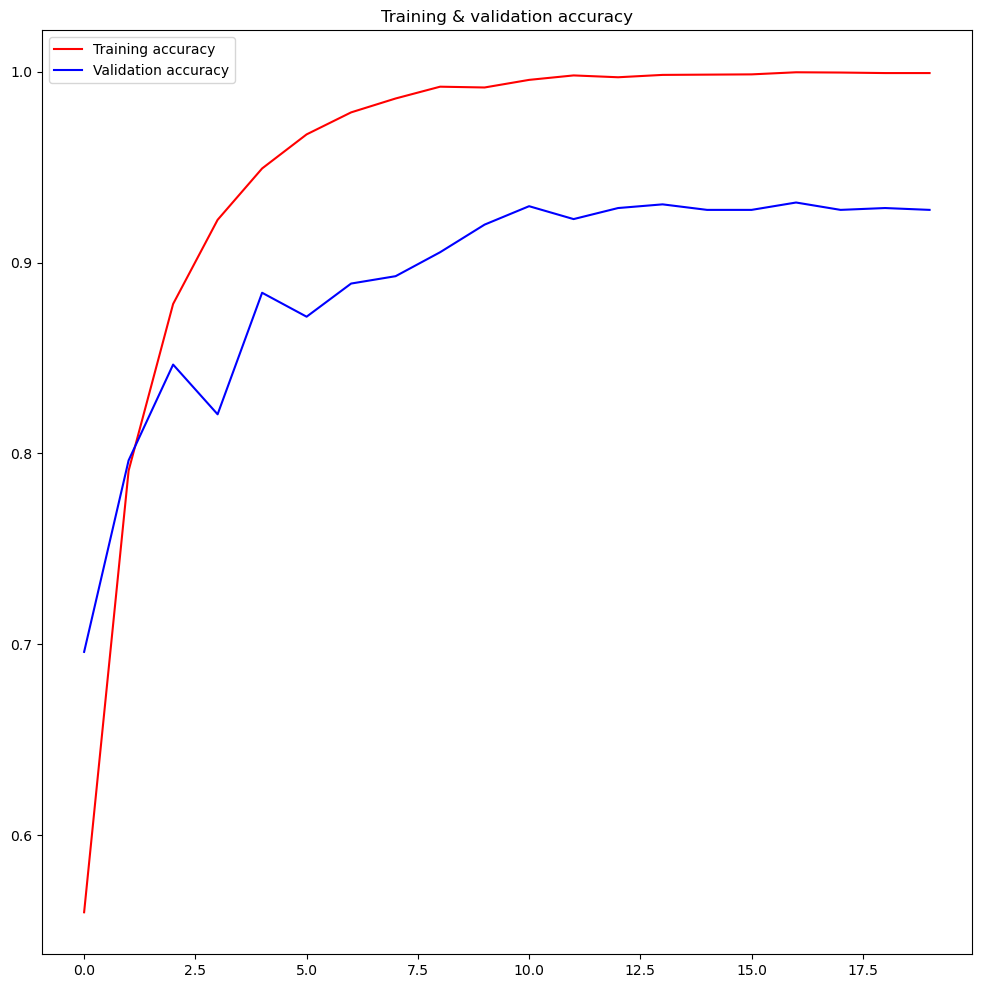

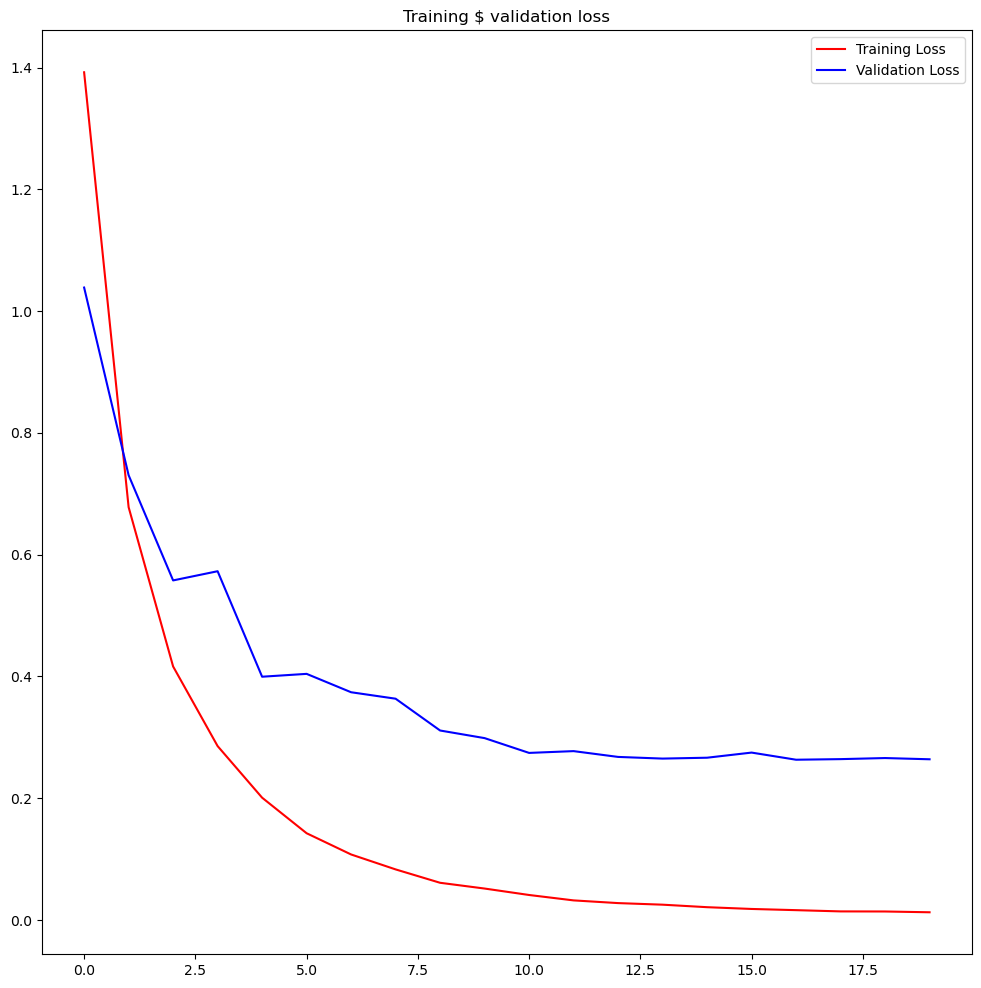

In [16]:
print("metrics of xceptionV3")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

In [17]:
import numpy as np

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

In [19]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions = model.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

33/33 [==============================] - 38s 1s/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.93      0.84      0.88        97
   bacterial_leaf_streak       0.95      0.95      0.95        76
bacterial_panicle_blight       0.94      0.86      0.89        69
                   blast       0.94      0.92      0.93       349
              brown_spot       0.91      0.89      0.90       194
              dead_heart       0.95      0.96      0.96       289
            downy_mildew       0.95      0.77      0.85       124
                   hispa       0.88      0.95      0.92       320
                  normal       0.92      0.95      0.93       354
                  tungro       0.88      0.94      0.91       219

                accuracy                           0.92      2091
               macro avg       0.93      0.90      0.91      2091
            weighted avg       0.92      0.92      0.92      2091



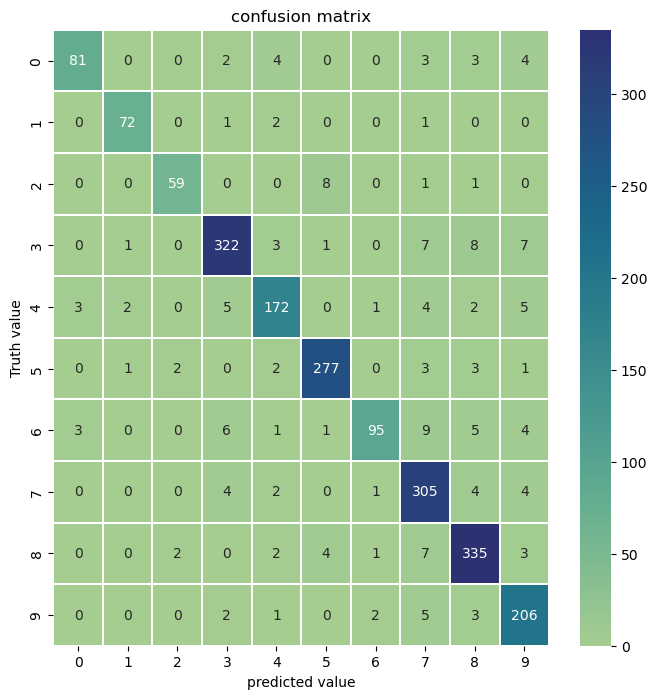

[[ 81   0   0   2   4   0   0   3   3   4]
 [  0  72   0   1   2   0   0   1   0   0]
 [  0   0  59   0   0   8   0   1   1   0]
 [  0   1   0 322   3   1   0   7   8   7]
 [  3   2   0   5 172   0   1   4   2   5]
 [  0   1   2   0   2 277   0   3   3   1]
 [  3   0   0   6   1   1  95   9   5   4]
 [  0   0   0   4   2   0   1 305   4   4]
 [  0   0   2   0   2   4   1   7 335   3]
 [  0   0   0   2   1   0   2   5   3 206]]


In [20]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


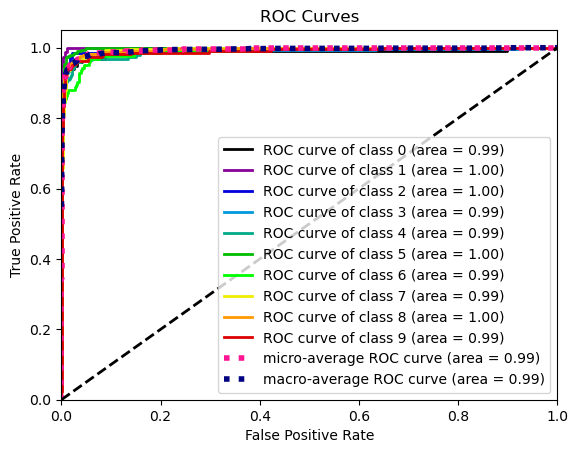

In [21]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()